## connect sqlite3

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('C:/Users/Stephen/Google Drive/Dataq/sqlite3/factbook.db')

q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q2 = "SELECT * from facts limit 5"
pd.read_sql_query(q2, conn)
# conn.close()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
q3 = "SELECT MIN(population) min_pop, MAX(population) max_pop, MIN(population_growth) min_pop_growth, MAX(population_growth) max_pop_growth from facts"
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


In [10]:
q4 = "SELECT * from facts where population == (select min(population) from facts)"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [12]:
q5 = "SELECT * from facts where population == (SELECT MAX(population) from facts)"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Antarctica has 0 population. Meanwhile World has 7.2 billion 

C:\Users\Stephen\Anaconda3\envs\python37\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190CC259BA8>,
      dtype=object)

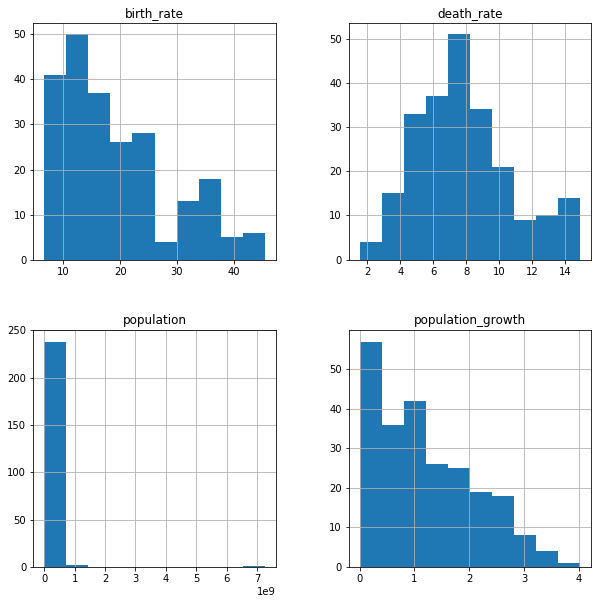

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
SELECT population, population_growth, birth_rate, death_rate
from facts 
WHERE population != ((SELECT min(population) from facts) 
AND (SELECT max(population) from facts))
'''
pd.read_sql_query(q6,conn).hist(ax=ax)

### Which contries have the highest population density?

In [19]:
q7 = '''
select name, cast(population as float)/cast(area as float) density 
from facts order by density desc limit 20
'''
pd.read_sql_query(q7,conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000190CD102828>],
      dtype=object)

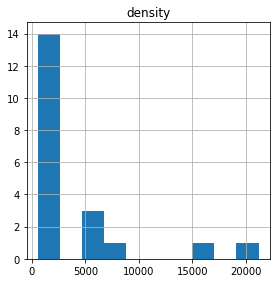

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(222)
pd.read_sql_query(q7, conn).hist(ax=ax)